***
# <font color=blue size=10>Regressão Linear</font>
***

Nesta Aula, você terá a oportunidade de utilizar o método de regressão linear para resolver um problema prático. Vamos utilizar o dataset de diabetes de Stanford, disponibilizado pela biblioteca scikit-learn, para realizar a tarefa de  predição da glicose do sangue.

# Importando Bibliotecas

In [73]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Regressão Linear (Resumo)

## Resumo de Regressão Linear

A **Regressão Linear** é um método estatístico usado para modelar a relação entre uma variável dependente (target) e uma ou mais variáveis independentes (features). Seu objetivo é encontrar a **melhor reta (ou hiperplano)** que minimize a diferença entre os valores previstos e os reais.

---

### Equação Geral

Para **regressão linear múltipla**:

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$$

Onde:
- $\hat{y}$ é o valor previsto
- $ \theta_0 $ é o intercepto (bias)
- $ \theta_i $ são os coeficientes (pesos) das variáveis \( x_i \)

---

### Objetivo do Modelo

Minimizar a **função de custo** (erro quadrático médio):

$$
J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

### Suposições da Regressão Linear

1. **Linearidade**: Relação linear entre features e target  
2. **Independência** dos erros  
3. **Homoscedasticidade**: Variância constante dos erros  
4. **Normalidade dos resíduos**  
5. **Ausência de multicolinearidade severa**

---

### Avaliação do Modelo

- **MSE (Mean Squared Error)**: média dos erros quadráticos  
- **RMSE**: raiz quadrada do MSE  
- **MAE (Mean Absolute Error)**: média dos erros absolutos  
- **R² (Coeficiente de Determinação)**: proporção da variância explicada

# Baixando Dataset

## Medical Cost Personal Dataset (Insurance Dataset)

O **Medical Cost Personal Dataset**, também conhecido como **Insurance Dataset**, é um dataset amplamente utilizado em tarefas didáticas de **regressão**, com o objetivo de prever o custo do seguro de saúde com base em variáveis demográficas e de estilo de vida. Ele contém dados de **1.338 indivíduos** residentes nos Estados Unidos, incluindo informações como idade, índice de massa corporal, número de filhos, tabagismo e região de residência.

---

### Características do Conjunto de Dados

- **Número de amostras:** 1.338  
- **Número de atributos:** 6 atributos preditivos  
- **Tipo de tarefa:** Regressão  
- **Valores ausentes:** Nenhum valor ausente explícito no dataset original

---

### Atributos

As variáveis incluem características pessoais e hábitos relacionados à saúde:

- `age` – Idade do indivíduo (anos)  
- `sex` – Sexo biológico (`male`, `female`)  
- `bmi` – Índice de massa corporal (peso em kg / altura em m²)  
- `children` – Número de filhos dependentes declarados  
- `smoker` – Indica se o indivíduo é fumante (`yes`, `no`)  
- `region` – Região de residência nos EUA (`northeast`, `southeast`, `southwest`, `northwest`)  

**Variável alvo:**

- `charges` – Custo do seguro de saúde (em dólares)

---

### Estatísticas Resumidas

| Atributo   | Mínimo | Máximo |
|------------|--------|--------|
| age        | 18     | 64     |
| bmi        | 15.96  | 53.13  |
| children   | 0      | 5      |
| charges    | 1,122  | 63,770 |
| sex        | -      | -      |
| smoker     | -      | -      |
| region     | -      | -      |

**Observação:** As variáveis `sex`, `smoker` e `region` são categóricas.

---

### Fonte dos Dados

- **Publicador:** Kaggle  
- **Autor original:** Miri Choi  
- **URL original:** [https://www.kaggle.com/datasets/mirichoi0218/insurance](https://www.kaggle.com/datasets/mirichoi0218/insurance)  

---

### Referências

- Dataset hospedado no Kaggle para fins educacionais e demonstrações de aprendizado de máquina.  
- Amplamente utilizado em tutoriais de regressão linear, regressão com regularização, e pipelines de pré-processamento.


In [74]:
path = "https://github.com/Lucas-Junqueira/JMR_Pratica_IA/raw/refs/heads/main/dados/insurance.csv"
df = pd.read_csv(path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Em estatística e aprendizado de máquina, as **variáveis independentes** (também chamadas de preditoras, explicativas ou features) são aquelas que usamos para tentar explicar ou prever outra variável. Já a **variável dependente** (também chamada de alvo, resposta ou output) é aquela que queremos entender ou prever com base nas variáveis independentes.

Nesta tarefa, como desejamos predizer o valor do seguro de vida de um paciente, nossas variáveis dependentes e independentes serão:
 - Variáveis Independentes: **age, sex, bmi, children, smoker, region_northwest, region_southeast, region_southwest**
 - Variável Dependente: **charges**

Utilizaremos o método de regressão linear para predizer a variável **'charges'**, mas antes, vamos fazer uma análise exploratória para entendermos melhor o conjunto de dados que temos. 

# Análise Exploratória dos Dados

In [75]:
# Exibindo informações básicas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Com base na linha de código acima e também na exibição dos dados, podemos perceber que algumas variáveis categóricas do dataset estão representadas em formato de texto (strings). Para que possamos continuar nosso pipeline de regressão linear, temos que codificar estas strings em valores inteiros

In [76]:
# Codificando variáveis
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [77]:
# Exibindo estatísticas descritivas - média, desvio padrão, mínimo, máximos e quartis.
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


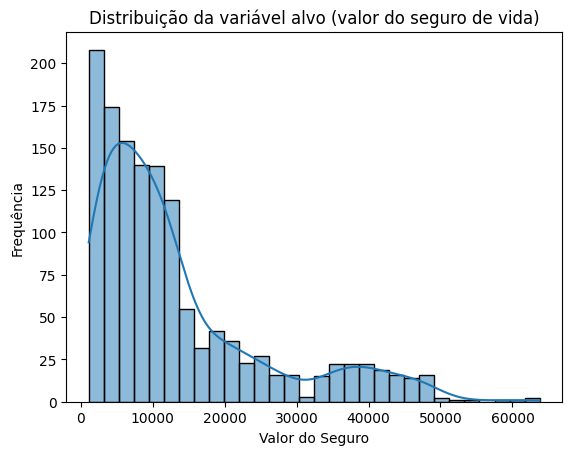

In [78]:
# Verificando distribuição da variável alvo (charges)
sns.histplot(df["charges"], kde=True)
plt.title("Distribuição da variável alvo (valor do seguro de vida)")
plt.xlabel("Valor do Seguro")
plt.ylabel("Frequência")
plt.show()

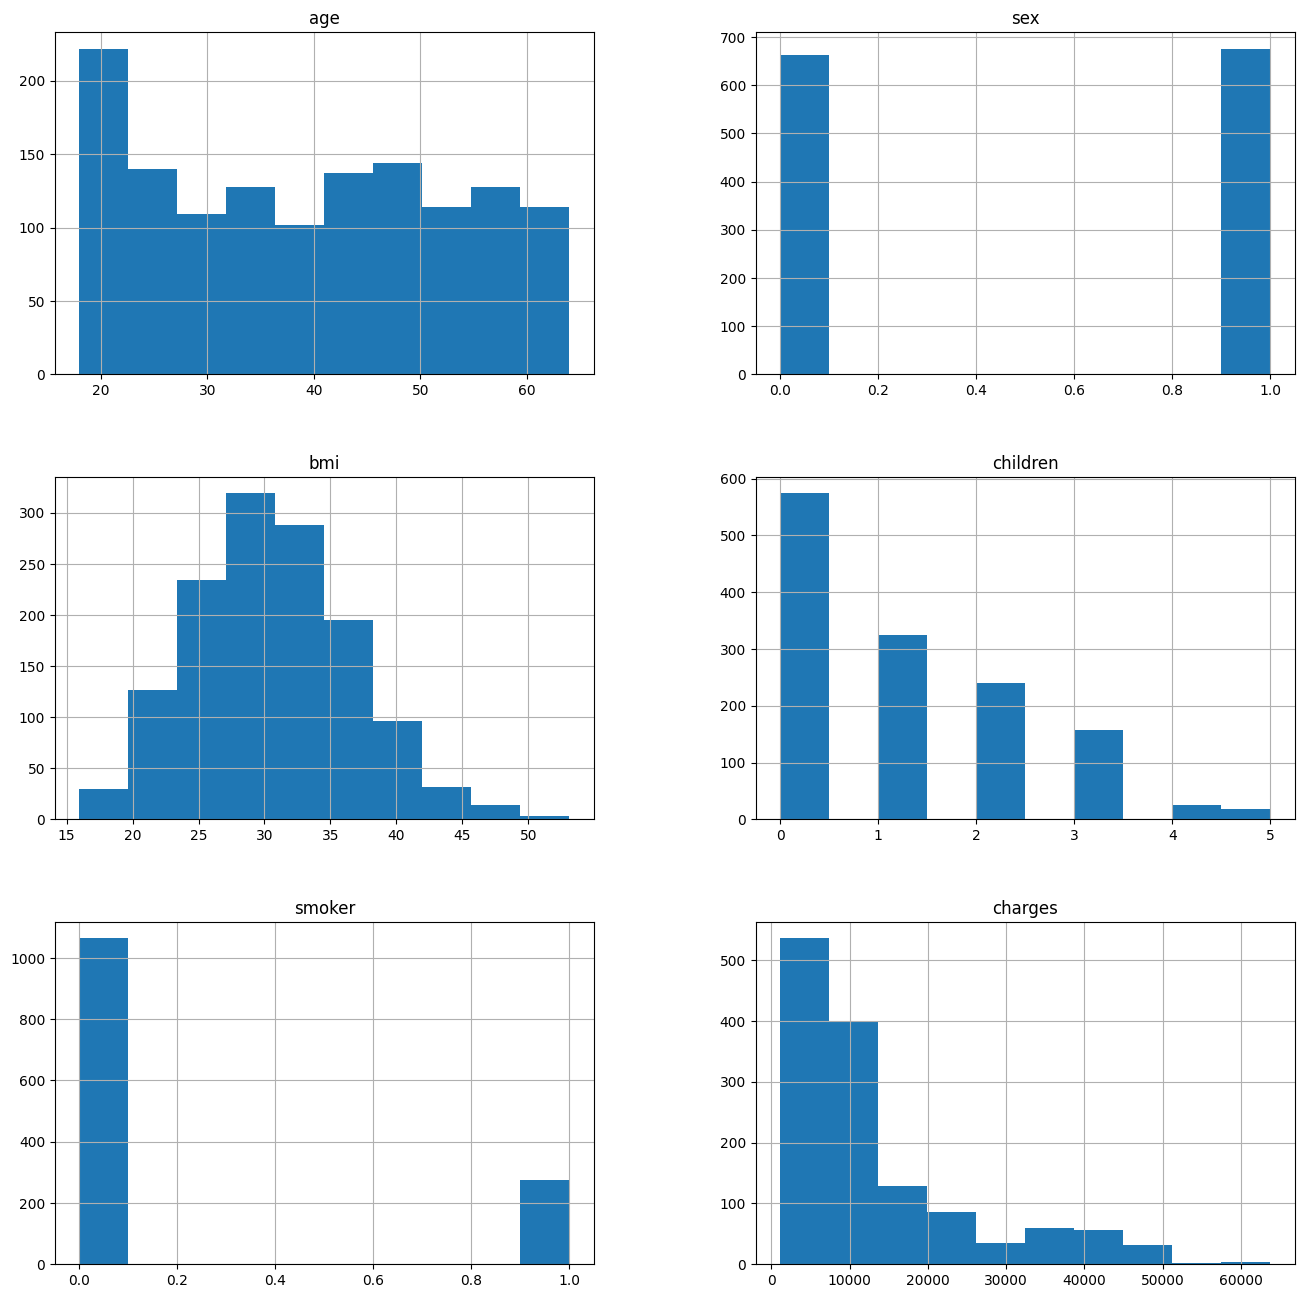

In [79]:
# Visualização da distribuição geral das variáveis
p = df.hist(figsize = (16,16))

Uma tarefa importante de pré-processamento dos dados em um pipeline de machine learning, é garantir que os dados numéricos estejam normalizados ou padronizados, caso contrário, nosso modelo (neste caso, um modelo de regressão) pode ser prejudicado. Por isso, padronizaremos os dados com a ferramenta **'StandardScaler()'** do scikit-learn para padronizar os dados com base na **média = 0 e desvio padrão = 1**.

In [80]:
# Separação das features numéricas
features_to_scale = ['age', 'bmi', 'children', 'charges']

# Inicializar e ajustar o scaler
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df[features_to_scale])

# Substituir no DataFrame original
df[features_to_scale] = df_scaled_values

## Matriz de Correlação

Agora, para entendermos melhor como as variáveis se relacionam, vamos plotar uma **matriz de correlação**, que mostra a relação linear entre variáveis, com valores entre -1 e 1:

- **+1**: correlação positiva perfeita (ambas aumentam juntas)
- **0**: sem correlação linear
- **-1**: correlação negativa perfeita (uma aumenta, outra diminui)

A correlação indica o quanto uma variável pode ser prevista linearmente a partir de outra.

Além disso, **Dependência linear** significa que duas variáveis estão relacionadas por uma equação do tipo:  
\[
y = a \cdot x + b
\]

Ou seja, uma pode ser expressa como uma combinação linear da outra.

Valores próximos a +1 ou -1 indicam forte dependência linear.

---

**Exemplo:** Se o índice de massa corporal (`bmi`) tem alta correlação positiva com o valor do seguro (`charges`), isso indica que pacientes com maior `bmi` tendem a ser cobrados um valor maior de seguro.


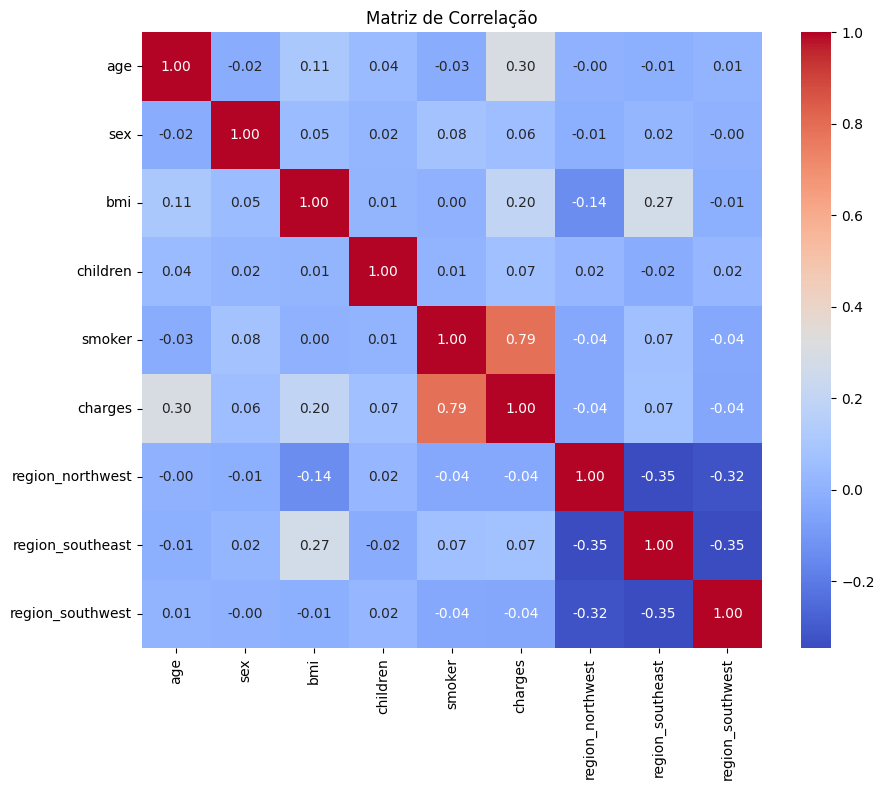

In [81]:
# Exibindo Correlação entre as variáveis
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Agora, vamos visualizar separadamente como as variáveis se correlacionam com a variável **'charges'** especificamente

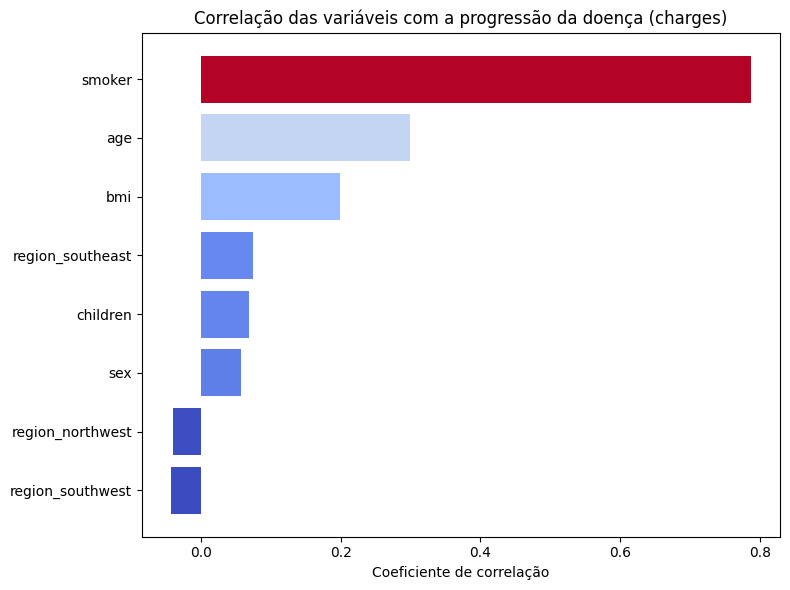

In [82]:
# Correlação com a variável alvo
correlations = df.corr()["charges"].drop("charges").sort_values(ascending=False)

# Criar um colormap coolwarm
cmap = plt.get_cmap("coolwarm")

# Normalizar os valores para o range 0-1 para mapear cores
norm = plt.Normalize(vmin=correlations.min(), vmax=correlations.max())
colors = cmap(norm(correlations.values))

plt.figure(figsize=(8, 6))

bars = plt.barh(correlations.index, correlations.values, color=colors)
plt.xlabel("Coeficiente de correlação")
plt.title("Correlação das variáveis com a progressão da doença (charges)")
plt.gca().invert_yaxis()  # para deixar o maior no topo
plt.tight_layout()
plt.show()


Pelo gráfico acima, podemos perceber que variáveis como **'smoker'** e **'age'** possuem correlação positiva com a variável **'charges'**, enquanto variáveis como **'region_northwest'** e **'region_southwest'** possuem uma correlação negativa com esta. Além disso, podemos perceber que a variável **'smoker'** possui uma alta correlação, enquanto outras variáveis, como **'region_northwest'**, possuem correlação baixa.

In [83]:
# Seleciona colunas com correlação > 0.1 ou < -0.1, excluindo a própria 'target'
corr = df.corr()['charges']
selected_columns = corr[(corr.abs() > 0.0) & (corr.index != 'charges')].index.tolist()

print("Colunas selecionadas:", selected_columns)
df = df[selected_columns + ['charges']]

Colunas selecionadas: ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']


## Importância de Verificar Boxplots nos Dados

Agora, com o intuito de verificar a distribuição dos dados, plotaremos gráficos **boxplots**. Este tipo de gráfico é uma ferramenta visual fundamental para identificar características importantes, como:

- **Outliers:** Valores muito distantes da maioria dos dados que podem distorcer análises e modelos.
- **Assimetria (skewness):** Indicativo se os dados estão enviesados para valores altos ou baixos.
- **Dispersão:** Amplitude e variabilidade dos dados.
- **Mediana e Quartis:** Informam a tendência central e a dispersão sem serem influenciados por outliers.

### Por que verificar os boxplots?

- **Detecção de outliers:** Identificar e tratar valores extremos que podem afetar o desempenho dos modelos.
- **Decisões de pré-processamento:** Saber se é necessário normalizar, transformar ou filtrar dados.
- **Qualidade dos dados:** Avaliar se os dados possuem inconsistências ou erros.
- **Compreensão do dataset:** Ajudar a entender o comportamento das variáveis antes de construir modelos.

Em resumo, os boxplots são uma etapa essencial na análise exploratória para garantir que os dados estejam adequados para modelagem e evitar problemas futuros.


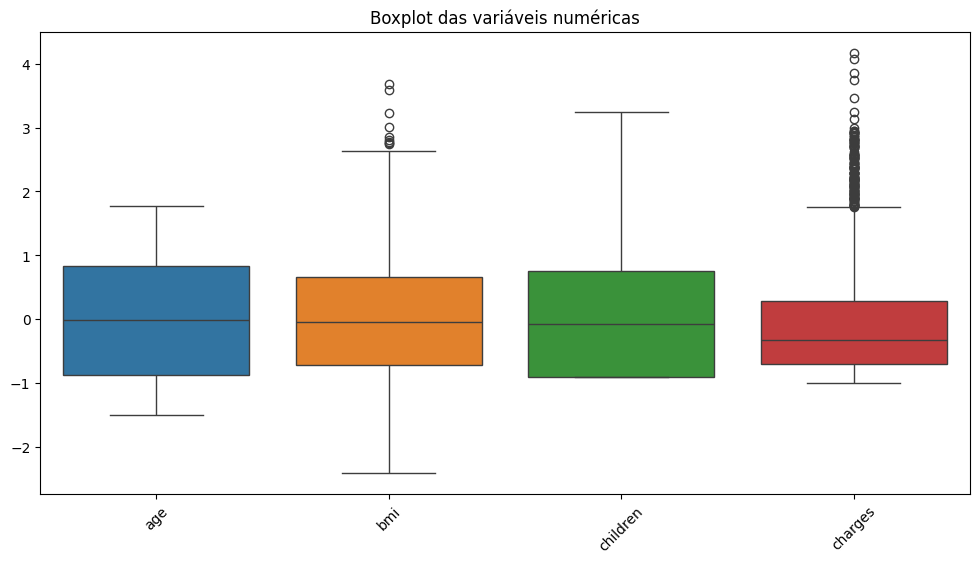

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'bmi', 'children', 'charges']])
plt.title("Boxplot das variáveis numéricas")
plt.xticks(rotation=45)
plt.show()


In [85]:
# Filtragem de outliers
def remove_outliers_iqr(df, cols, con_value=0.05):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(con_value)
        Q3 = df_clean[col].quantile(1-con_value)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Aplica a remoção de outliers nas colunas numéricas
cols_to_check = ['age', 'bmi', 'children', 'charges']
df_filtered = remove_outliers_iqr(df, cols_to_check, 0.05)

print(f"Original: {df.shape[0]} amostras")
print(f"Após remoção de outliers: {df_filtered.shape[0]} amostras")

# df_filtered.head()
df = df_filtered

Original: 1338 amostras
Após remoção de outliers: 1338 amostras


# Separação dos Dados Entre Treino, Validação e Teste

A separação do conjunto de dados em **treino**, **validação** e **teste** é essencial para garantir uma avaliação justa e eficaz do modelo, durente o processo de **machine learning**.

- **Treino (Training set):**
  Usado para ajustar (treinar) o modelo. O modelo aprende os padrões a partir desses dados.

- **Validação (Validation set):**
  Usado para ajustar hiperparâmetros e tomar decisões de modelagem sem viciar o teste. Serve como um "teste interno" durante o desenvolvimento.

- **Teste (Test set):**
  Usado somente no final para avaliar o desempenho real do modelo, simulando dados nunca vistos.

Essa divisão evita **overfitting**, garante uma avaliação **honesta** e melhora a **generalização** do modelo.


In [86]:
# Separar X e y
X = df.drop("charges", axis=1)
y = df["charges"]

# Etapa 1: separar TESTE (20%) e o restante (80%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Etapa 2: separar o restante em TREINO (70%) e VALIDAÇÃO (10%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)
# (0.125 de 80% = 10% do total)

# Verificando os tamanhos
print(f"Tamanho do conjunto de treino:     {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]} amostras")
print(f"Tamanho do conjunto de teste:     {X_test.shape[0]} amostras")

Tamanho do conjunto de treino:     936 amostras
Tamanho do conjunto de validação: 134 amostras
Tamanho do conjunto de teste:     268 amostras


## Regressão Linear

Agora, é chegado a hora de realizar a regressão linear e avaliar seus resultados. Utilizaremos o regressor **'LinearRegression'** disponibilizado pela biblioteca scikit-learn e as métricas MSE e R² para validar o desempenho da regressão.

### Métricas utilizadas:

- **MSE (Erro Quadrático Médio):**
  Mede o erro médio ao quadrado entre as previsões e os valores reais.
  - Quanto menor, melhor.
  - Sensível a erros grandes.

- **R² (Coeficiente de Determinação):**
  Mede a proporção da variância do alvo explicada pelo modelo.
  - Varia de 0 a 1 (ou pode ser negativo).
  - **R² ≈ 1:** excelente ajuste.
  - **R² ≈ 0:** modelo não explica a variabilidade dos dados.

### Interpretação:
- Um bom modelo tem **R² alto** e **MSE baixo** tanto em validação quanto em teste.
- Diferenças grandes entre validação e teste podem indicar **overfitting** (modelo "decorou" o treino).

In [87]:
# 1. Criar o modelo
model = LinearRegression()

# 2. Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# 3. Prever no conjunto de validação
y_val_pred = model.predict(X_val)

# 4. Prever no conjunto de teste
y_test_pred = model.predict(X_test)

# 5. Avaliar desempenho
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 6. Mostrar resultados
print("Resultados da Validação:")
print(f"  - Erro quadrático médio (MSE): {mse_val:.2f}")
print(f"  - Coeficiente de determinação (R²): {r2_val:.2f}")

print("\nResultados do Teste:")
print(f"  - Erro quadrático médio (MSE): {mse_test:.2f}")
print(f"  - Coeficiente de determinação (R²): {r2_test:.2f}")


Resultados da Validação:
  - Erro quadrático médio (MSE): 0.28
  - Coeficiente de determinação (R²): 0.78

Resultados do Teste:
  - Erro quadrático médio (MSE): 0.23
  - Coeficiente de determinação (R²): 0.78


# Limitações: Regressão Linear vs Problemas não Lineares

## Dataset Friedman #1 e Regressão Linear

O **Friedman #1** é um dataset sintético de regressão projetado para avaliar algoritmos em cenários **não lineares**. Cada amostra possui várias features contínuas (tipicamente 10), e o valor alvo é definido como:

\[
y = 10 \cdot \sin(\pi \cdot X_1 \cdot X_2) + 20 \cdot (X_3 - 0.5)^2 + 10 \cdot X_4 + 5 \cdot X_5 + \text{ruído}
\]

Essa função combina **interações não lineares, termos quadráticos e lineares**, com ruído adicionado.  

### Por que a Regressão Linear falha

Modelos lineares só conseguem capturar **efeitos lineares diretos** das features. Como o Friedman #1 possui interações e curvaturas complexas, a regressão linear não consegue aproximar bem a função target, resultando em **alto erro de predição**.

### Solução

Modelos mais flexíveis, como **MLPs** ou **árvores de decisão**, conseguem capturar essas não linearidades e interações, alcançando **melhor desempenho** no problema.


MSE Regressão Linear: 8.1835
MSE MLP Regressor: 3.6634


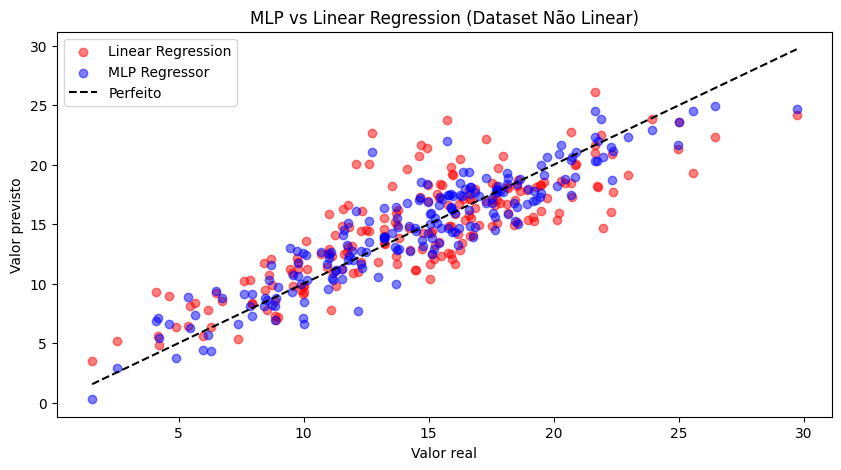

In [97]:
# --- Criar dataset não linear manualmente (equivalente a Friedman #1) ---
np.random.seed(42)
n_samples = 1000
n_features = 15
X = np.random.rand(n_samples, n_features)

# Função target complexa não linear
y = (10 * np.sin(np.pi * X[:,0] * X[:,1]) + 
     20 * (X[:,2] - 0.5)**2 + 
     10 * X[:,3] + 5 * X[:,4] +
     np.random.normal(0, 1.0, n_samples))
y = y.reshape(-1,1)

# --- Divisão treino/teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Normalização ---
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# --- Modelos ---
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
y_pred_lr = lr.predict(X_test_scaled)

# MLP Regressor com early stopping e regularização
mlp = MLPRegressor(hidden_layer_sizes=(75,), activation='relu',
                   alpha=0.0001, max_iter=3000, early_stopping=True, random_state=42)
mlp.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_mlp = mlp.predict(X_test_scaled)

# --- Desnormalizar predições ---
y_pred_lr_orig = scaler_y.inverse_transform(y_pred_lr)
y_pred_mlp_orig = scaler_y.inverse_transform(y_pred_mlp.reshape(-1,1))
y_test_orig = scaler_y.inverse_transform(y_test_scaled)

# --- Avaliar desempenho ---
mse_lr = mean_squared_error(y_test_orig, y_pred_lr_orig)
mse_mlp = mean_squared_error(y_test_orig, y_pred_mlp_orig)
print(f"MSE Regressão Linear: {mse_lr:.4f}")
print(f"MSE MLP Regressor: {mse_mlp:.4f}")

# --- Visualização ---
plt.figure(figsize=(10,5))
plt.scatter(y_test_orig, y_pred_lr_orig, label='Linear Regression', alpha=0.5, color='red')
plt.scatter(y_test_orig, y_pred_mlp_orig, label='MLP Regressor', alpha=0.5, color='blue')
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()], 'k--', label='Perfeito')
plt.xlabel("Valor real")
plt.ylabel("Valor previsto")
plt.title("MLP vs Linear Regression (Dataset Não Linear)")
plt.legend()
plt.show()
